FLOW OF ANALYSIS

1. Data cleaning and data manipulation.
 - Check and handle duplicate data.
 - Check and handle NA values and missing values.
 - Drop columns. If it contains large amount of missing values and not used for analysis.
 - Imputation of the values.
2. EDA
 - Univariate data analysis,values_count,distribution of variable.
 - Bivariate data analysis,correlation coefficients and pattern between the variable.
3. Feature Scaling and Creating Dummy Variable.
4. Handling historiacal data and performing sampling.
5. Building Model: Logistic regression, Decision Tree, Random forest Model used for the model making and prediction.
6. Validation of the model.

Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

Importing Data Set and concating the data set.

In [2]:
df_train = pd.read_csv("fraudTrain.csv")
df_train = df_train.drop(df_train.columns[0], axis=1)

df_test = pd.read_csv("fraudTest.csv")
df_test = df_test.drop(df_test.columns[0], axis=1)

dataset = [df_train, df_test]
df = pd.concat(dataset)
    
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [3]:
df.shape

(190569, 22)

In [4]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.905690e+05,190568.000000,190568.000000,190568.000000,190568.000000,1.905680e+05,1.905680e+05,190567.000000,190567.000000,190567.000000
mean,4.164067e+17,70.481315,48766.338011,38.542594,-90.193316,8.929864e+04,1.350951e+09,38.541698,-90.194039,0.006764
std,1.307501e+18,150.210461,26876.319924,5.073295,13.740105,3.021550e+05,2.298329e+07,5.107902,13.753349,0.081965
min,5.456776e+06,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.374000e+03,19.029798,-166.670132,0.000000
25%,1.800429e+14,9.670000,26237.000000,34.668900,-96.790900,7.430000e+02,1.327789e+09,34.754107,-96.871186,0.000000
50%,3.519607e+15,47.630000,48174.000000,39.371600,-87.461600,2.435000e+03,1.371857e+09,39.372077,-87.419185,0.000000
75%,4.635331e+15,83.440000,72011.000000,41.940400,-80.158000,2.032800e+04,1.373232e+09,41.957328,-80.218188,0.000000
max,4.992346e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.374757e+09,66.669356,-66.952352,1.000000


In [5]:
df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                      float64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

Handling Missing Values

In [6]:
df = df[~pd.isnull(df['state'])]
df = df[~pd.isnull(df['zip'])]
df = df[~pd.isnull(df['lat'])]
df = df[~pd.isnull(df['long'])]
df = df[~pd.isnull(df['city_pop'])]
df= df[~pd.isnull(df['job'])]
df = df[~pd.isnull(df['dob'])]
df = df[~pd.isnull(df['trans_num'])]
df = df[~pd.isnull(df['unix_time'])]
df = df[~pd.isnull(df['merch_lat'])]
df = df[~pd.isnull(df['merch_long'])]
df = df[~pd.isnull(df['is_fraud'])]

In [7]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Checking how many percentage of fraud does fraudsters do.

In [8]:
df_fraud = df[['is_fraud','trans_num']].groupby(['is_fraud']).count().reset_index()
df_fraud.columns = ['is_fraud','count']

df_fraud['percent'] = (df_fraud['count']/df_fraud['count'].sum())*100

df_fraud

,is_fraud,count,percent
0,0.0,189278,99.323597
1,1.0,1289,0.676403


In [9]:
df.nunique()

trans_date_trans_time    187664
cc_num                      922
merchant                    693
category                     14
amt                       26174
first                       340
last                        470
gender                        2
street                      922
city                        848
state                        50
zip                         911
lat                         909
long                        909
city_pop                    833
job                         480
dob                         908
trans_num                190567
unix_time                187664
merch_lat                189483
merch_long               190088
is_fraud                      2
dtype: int64

Converting trans_date_trans_time from object to date time format.

In [10]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [11]:
df.dtypes['trans_date_trans_time']

dtype('<M8[ns]')

In [12]:
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_hour']

0         0
1         0
2         0
3         0
4         0
         ..
97195    12
97196    12
97197    12
97198    12
97199    12
Name: trans_hour, Length: 190567, dtype: int64

In [13]:
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['day_of_week']

0         Tuesday
1         Tuesday
2         Tuesday
3         Tuesday
4         Tuesday
           ...   
97195    Saturday
97196    Saturday
97197    Saturday
97198    Saturday
97199    Saturday
Name: day_of_week, Length: 190567, dtype: object

In [14]:
df['day_of_week'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [15]:
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['year_month']

0        2019-01
1        2019-01
2        2019-01
3        2019-01
4        2019-01
          ...   
97195    2020-07
97196    2020-07
97197    2020-07
97198    2020-07
97199    2020-07
Name: year_month, Length: 190567, dtype: period[M]

Checking Overall distribution amountwise.

In [16]:
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

,Row Type,Overall Amt Distribution,Non Fraud Amt Distribution,Fraud Amt Distribution
0,count,190567.000000,189278.000000,1289.000000
1,mean,70.481197,67.404965,522.198123
2,std,150.210846,142.337062,394.317798
3,min,1.000000,1.000000,4.500000
4,50%,47.630000,47.370000,352.480000
5,95%,196.320000,189.391500,1091.876000
6,99.9%,1493.273540,1502.081600,1290.499280
7,max,13149.150000,13149.150000,1334.070000


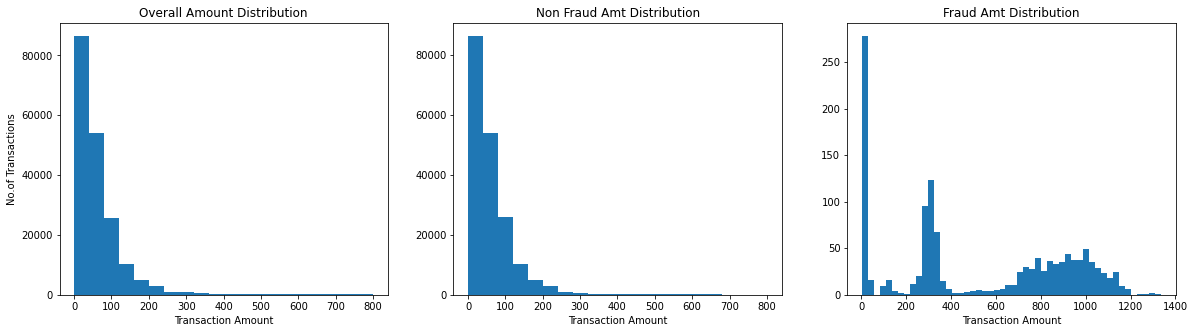

In [17]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df[df['amt']<=800]['amt'], bins=20)
ax[1].hist(df[(df['is_fraud']==0) & (df['amt']<=800)]['amt'], bins=20)
ax[2].hist(df[(df['is_fraud']==1) & (df['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amount Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('No.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

It shows that mostly fraud are done at the amount range of 500-1200.

Checking month and year wise no of actual and fraud transcation as well as number of fraud vs real customers.

In [18]:
df_timeline01 = df.groupby(df['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['year_month','num_of_ transactions','customers']
df_timeline01.head()

df_fraud_transactions = df[df['is_fraud']==1]

df_timeline02 = df_fraud_transactions.groupby(df_fraud_transactions['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline02.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_timeline02.head()

,year_month,num_of_fraud_transactions,fraud_customers
0,2019-01,506,50
1,2019-02,386,42
2,2020-06,133,15
3,2020-07,264,29


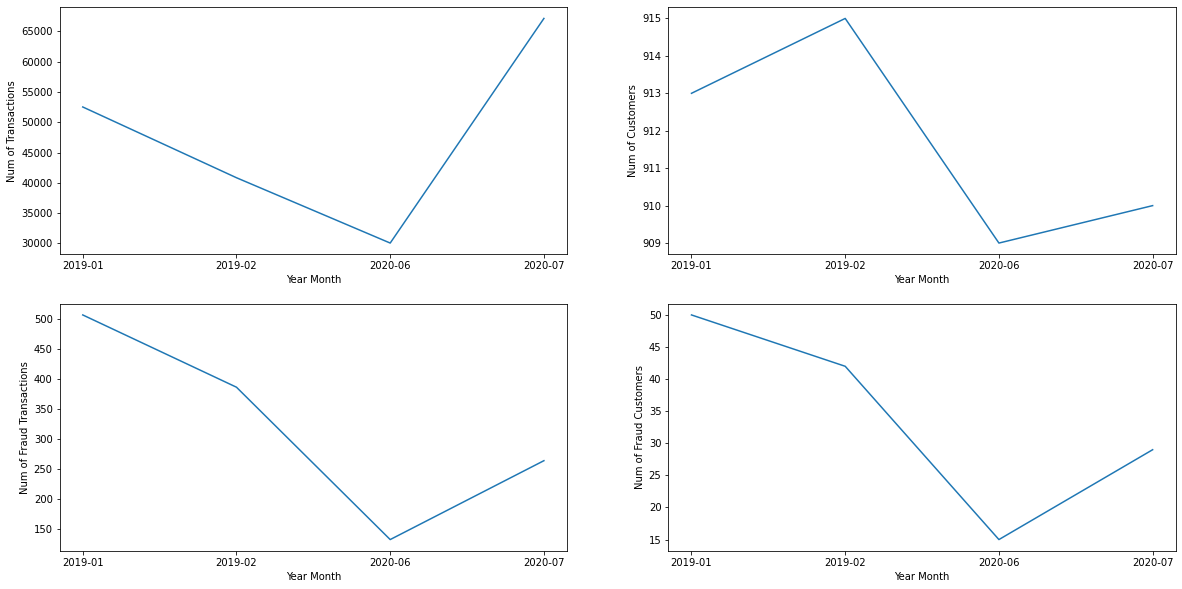

In [19]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(2,2,figsize=(20,10))
ax[0,0].plot(x,df_timeline01['num_of_ transactions'])
ax[0,0].set_xticks(x)
ax[0,0].set_xticklabels(df_timeline01['year_month'])
ax[0,0].set_xlabel('Year Month')
ax[0,0].set_ylabel('Num of Transactions')

ax[0,1].plot(x,df_timeline01['customers'])
ax[0,1].set_xticks(x)
ax[0,1].set_xticklabels(df_timeline01['year_month'])
ax[0,1].set_xlabel('Year Month')
ax[0,1].set_ylabel('Num of Customers')

ax[1,0].plot(x,df_timeline02['num_of_fraud_transactions'])
ax[1,0].set_xticks(x)
ax[1,0].set_xticklabels(df_timeline02['year_month'])
ax[1,0].set_xlabel('Year Month')
ax[1,0].set_ylabel('Num of Fraud Transactions')

ax[1,1].plot(x,df_timeline02['fraud_customers'])
ax[1,1].set_xticks(x)
ax[1,1].set_xticklabels(df_timeline02['year_month'])
ax[1,1].set_xlabel('Year Month')
ax[1,1].set_ylabel('Num of Fraud Customers')

plt.show()

Checking Gender wise Fraud Transcation.

In [20]:
df_gender = df[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

,Gender,gender_count,percent
0,F,104252,54.706219
1,M,86315,45.293781


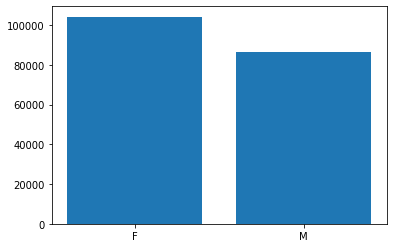

In [21]:
plt.bar(df_gender['Gender'], df_gender['gender_count'])

plt.show()

In [22]:
df_fraud_gender = df[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100


df_fraud_gender

,Gender,is_fraud,count,gender_count,percent_grp
0,F,0.0,103558,104252,99.334305
1,F,1.0,694,104252,0.665695
2,M,0.0,85720,86315,99.310664
3,M,1.0,595,86315,0.689336


Now we will have a look on category wise fraud transcation.

In [23]:
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

,Category,category_count,percent
2,gas_transport,19445,10.203760
6,home,17925,9.406141
4,grocery_pos,17906,9.396170
12,shopping_pos,17073,8.959054
7,kids_pets,16573,8.696679
11,shopping_net,14475,7.595754
0,entertainment,13767,7.224231
1,food_dining,13652,7.163885
10,personal_care,13445,7.055261
5,health_fitness,12789,6.711026


In [24]:
df_category = df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category

,index,Category,category_count,percent
0,2,gas_transport,19445,10.203760
1,6,home,17925,9.406141
2,4,grocery_pos,17906,9.396170
3,12,shopping_pos,17073,8.959054
4,7,kids_pets,16573,8.696679
5,11,shopping_net,14475,7.595754
6,0,entertainment,13767,7.224231
7,1,food_dining,13652,7.163885
8,10,personal_care,13445,7.055261
9,5,health_fitness,12789,6.711026


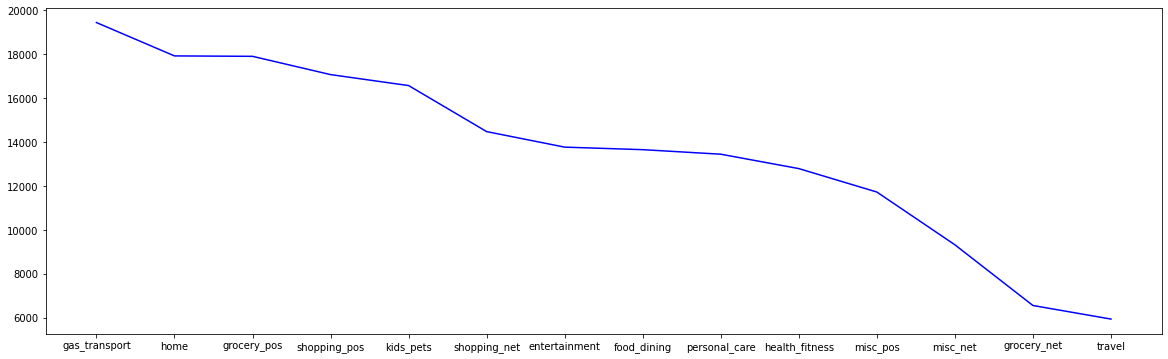

In [25]:
fig = plt.figure(figsize = (20, 6)) 


plt.plot(df_category['Category'], df_category['category_count'], color ='blue')

plt.show()

In [26]:
df_fraud_category = df[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100
#df_fraud_category.head()

In [27]:
df_fraud=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'])
df_fraud

,Category,is_fraud,count,category_count,percent,percent_grp
13,home,1.0,36,17925,9.406141,0.200837
11,health_fitness,1.0,27,12789,6.711026,0.211119
3,food_dining,1.0,29,13652,7.163885,0.212423
1,entertainment,1.0,31,13767,7.224231,0.225176
15,kids_pets,1.0,45,16573,8.696679,0.271526
21,personal_care,1.0,41,13445,7.055261,0.304946
7,grocery_net,1.0,22,6549,3.436587,0.335929
19,misc_pos,1.0,45,11721,6.150593,0.383926
27,travel,1.0,25,5931,3.112291,0.421514
5,gas_transport,1.0,100,19445,10.203760,0.514271


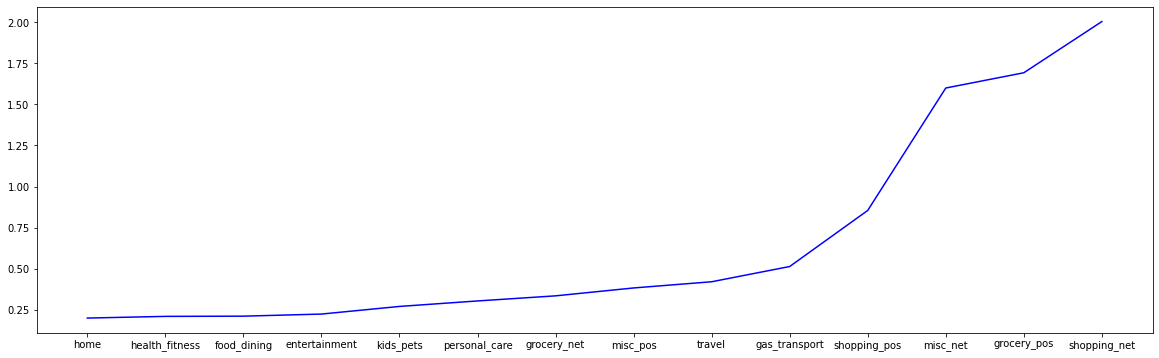

In [28]:
fig = plt.figure(figsize = (20, 6)) 


plt.plot(df_fraud['Category'] , df_fraud['percent_grp'], color ='blue'  
      )

plt.show()

Creating Dummy Variables

In [29]:
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df.day_of_week, prefix='week',drop_first=True)

In [30]:
df_new = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot], axis=1)

In [31]:
df_new.index = pd.to_datetime(df_new['trans_date_trans_time'])
df_new = df_new.rename_axis(index={'trans_date_trans_time': 'time_index'})
df_new = df_new.sort_index()
df_new.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
time_index,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,0,0,0,0,0,0,0,1,0
2019-01-01 00:00:44,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,0,0,0,0,0,0,0,0,1,0
2019-01-01 00:00:51,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,0,0,1,0,0,0,0,1,0
2019-01-01 00:01:16,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0,0,0,1,0,0,0,0,1,0
2019-01-01 00:03:06,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0,0,0,1,0,0,0,0,1,0


Handling Historical Data

In [32]:
df_new['val_for_agg'] = 1

In [33]:
df_hist_trans_60d = \
    df_new \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('60D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']

In [34]:
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date

In [35]:
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

In [36]:
df_hist_trans_amt_avg_60d = \
    df_new \
    .groupby(['cc_num'])['amt']\
    .rolling('60D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']

In [37]:
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date

In [38]:
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
['hist_trans_avg_amt_60d'].min().reset_index()

In [39]:
df_new['trans_date'] = df_new['trans_date_trans_time'].dt.date

In [40]:
df_final = df_new.merge(df_hist_trans_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [41]:
df_final = df_final.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [42]:
df_final[['hist_trans_60d','hist_trans_avg_amt_60d']]= \
df_final[['hist_trans_60d','hist_trans_avg_amt_60d']].fillna(0)

Looking For Coorelation

In [43]:
cols = ['amt','city_pop', 'trans_hour',
        'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','hist_trans_60d','hist_trans_avg_amt_60d','is_fraud']

In [44]:
corr = df_final[cols].corr()
corr

,amt,city_pop,trans_hour,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,gender_M,week_Monday,week_Tuesday,week_Wednesday,week_Thursday,week_Saturday,week_Sunday,hist_trans_60d,hist_trans_avg_amt_60d,is_fraud
amt,1.000000,0.005903,-0.027264,-0.036945,-0.015210,-0.020615,0.100276,-0.028281,-0.026179,-0.025319,...,0.002847,-0.002471,-0.000703,-0.001497,0.001094,0.001779,-0.000342,-0.007381,0.076688,0.248166
city_pop,0.005903,1.000000,0.016926,0.005873,-0.018329,0.022059,-0.001418,-0.005390,-0.005444,0.000380,...,-0.027829,0.003730,0.002864,-0.005132,-0.003656,-0.003807,0.006719,0.016279,0.018237,0.001514
trans_hour,-0.027264,0.016926,1.000000,0.138841,-0.363905,-0.200966,-0.333329,0.183151,0.221201,0.209526,...,-0.039163,0.002341,0.004838,-0.001647,-0.002497,-0.018006,0.014288,0.039861,-0.009029,0.013000
category_food_dining,-0.036945,0.005873,0.138841,1.000000,-0.093641,-0.052405,-0.089458,-0.074507,-0.089510,-0.085733,...,0.005906,-0.000937,-0.002068,-0.002665,0.001458,-0.004825,0.007880,-0.002316,0.005954,-0.015725
category_gas_transport,-0.015210,-0.018329,-0.363905,-0.093641,1.000000,-0.063593,-0.108556,-0.090413,-0.108619,-0.104036,...,-0.003879,0.002109,-0.003902,0.000717,-0.000860,0.006613,-0.005994,0.006678,-0.046926,-0.006668
category_grocery_net,-0.020615,0.022059,-0.200966,-0.052405,-0.063593,1.000000,-0.060752,-0.050598,-0.060787,-0.058222,...,-0.003142,0.002103,-0.002508,-0.001050,-0.001334,0.003934,-0.003314,0.026646,0.020776,-0.007836
category_grocery_pos,0.100276,-0.001418,-0.333329,-0.089458,-0.108556,-0.060752,1.000000,-0.086374,-0.103767,-0.099388,...,0.011189,-0.005057,-0.001923,-0.000507,0.005310,0.010960,-0.007650,0.004199,0.024899,0.039909
category_health_fitness,-0.028281,-0.005390,0.183151,-0.074507,-0.090413,-0.050598,-0.086374,1.000000,-0.086424,-0.082778,...,0.007305,-0.000996,0.001006,0.001436,0.000572,-0.003429,0.003698,-0.001667,-0.002063,-0.015225
category_home,-0.026179,-0.005444,0.221201,-0.089510,-0.108619,-0.060787,-0.103767,-0.086424,1.000000,-0.099447,...,0.012570,-0.005767,0.003476,0.001824,-0.000046,-0.003930,0.003570,-0.013788,0.005953,-0.018696
category_kids_pets,-0.025319,0.000380,0.209526,-0.085733,-0.104036,-0.058222,-0.099388,-0.082778,-0.099447,1.000000,...,-0.001891,-0.001095,0.003500,-0.001173,0.003061,-0.005822,0.000457,-0.009565,-0.003334,-0.015245


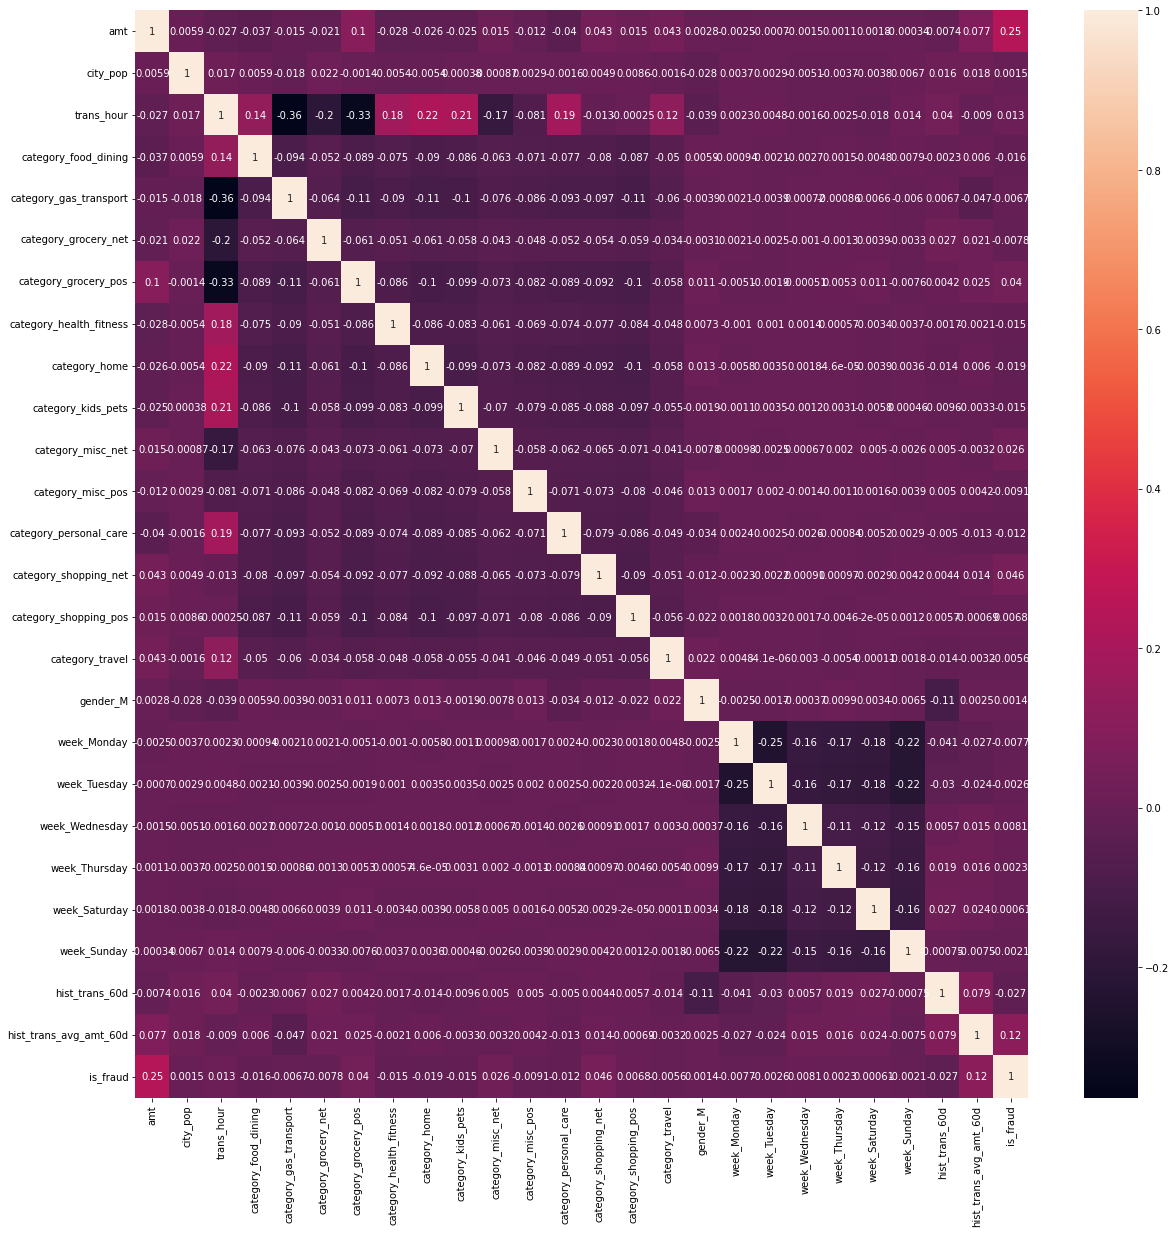

In [45]:
import seaborn as sn

fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(corr, annot=True)
plt.show()

Splitting the data.

In [46]:
X_cols = ['amt','city_pop', 'trans_hour',
        'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','hist_trans_60d','hist_trans_avg_amt_60d'] 

Y_cols = ['is_fraud']

Performing OVER SAMPLING

In [47]:
df_final_train = df_final.loc[(df_final['trans_date_trans_time'] >= '2019-03-01 00:00:00') \
    & (df_final['trans_date_trans_time'] <= '2020-06-30 23:23:00')][cols]

In [48]:
cnt_non_fraud = df_final_train[df_final_train['is_fraud'] == 0]['amt'].count()
df_final_class_fraud = df_final_train[df_final_train['is_fraud'] == 1]
df_final_class_nonfraud = df_final_train[df_final_train['is_fraud'] == 0]

In [49]:
df_final_class_fraud_oversample = df_final_class_fraud.sample(cnt_non_fraud, replace=True)
df_final_oversampled = pd.concat([df_final_class_nonfraud, df_final_class_fraud_oversample], axis=0)

print('Random over-sampling:')
print(df_final_oversampled['is_fraud'].value_counts())

Random over-sampling:
0.0    29786
1.0    29786
Name: is_fraud, dtype: int64


In [50]:
X_train = \
df_final_oversampled[X_cols]

y_train = \
df_final_oversampled[Y_cols]

In [51]:
X_test = df_final[(df_final['trans_date_trans_time'] >= '2019-05-01 00:00:00') \
    & (df_final['trans_date_trans_time'] <= '2020-08-30 23:23:00')][X_cols]

y_test = df_final[(df_final['trans_date_trans_time'] >= '2019-05-01 00:00:00') \
    & (df_final['trans_date_trans_time'] <= '2020-08-30 23:23:00')][Y_cols]

Model Building 

Building Logistic Regression Model

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logreg = LogisticRegression(random_state=42)

In [54]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

Evaluting the Model

In [55]:
  y_train_pred = logreg.predict(X_train)
  y_test_pred = logreg.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Logistic Model Train Results

In [57]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[25557  4229]
 [ 6706 23080]]
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82     29786
         1.0       0.85      0.77      0.81     29786

    accuracy                           0.82     59572
   macro avg       0.82      0.82      0.82     59572
weighted avg       0.82      0.82      0.82     59572



Logistic Model Test Results

In [58]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[90195  6608]
 [  126   271]]
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     96803
         1.0       0.04      0.68      0.07       397

    accuracy                           0.93     97200
   macro avg       0.52      0.81      0.52     97200
weighted avg       0.99      0.93      0.96     97200



Building Decision Tree Model

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

Decision Tree Train Model Results

In [60]:
print("Train Results")
pred_train = dt_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results
[[29786     0]
 [    0 29786]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29786
         1.0       1.00      1.00      1.00     29786

    accuracy                           1.00     59572
   macro avg       1.00      1.00      1.00     59572
weighted avg       1.00      1.00      1.00     59572



Decision Tree Test Model Results.

In [61]:
print("Test Results")
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results
[[96779    24]
 [  212   185]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     96803
         1.0       0.89      0.47      0.61       397

    accuracy                           1.00     97200
   macro avg       0.94      0.73      0.80     97200
weighted avg       1.00      1.00      1.00     97200



Building Random Forest Model

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf = RandomForestRegressor(n_estimators=20, random_state=42, n_jobs=-1, max_depth=5, min_samples_leaf=10)

In [64]:
rf.fit(X_train, y_train)

<ipython-input-64-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=20,
                      n_jobs=-1, random_state=42)

In [65]:
sample_tree = rf.estimators_[10]

In [66]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

Random Forest Model Test Results.

In [67]:
print("Train Results")
y_train_pred = rf.predict(X_train)


print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results
[[29786     0]
 [    0 29786]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29786
         1.0       1.00      1.00      1.00     29786

    accuracy                           1.00     59572
   macro avg       1.00      1.00      1.00     59572
weighted avg       1.00      1.00      1.00     59572



Random Forest Model Test Results.

In [68]:
print("Test Results")
y_test_pred = rf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results
[[96779    24]
 [  212   185]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     96803
         1.0       0.89      0.47      0.61       397

    accuracy                           1.00     97200
   macro avg       0.94      0.73      0.80     97200
weighted avg       1.00      1.00      1.00     97200



COST BENEFIT ANALYSIS

Average number of transactions per month.

In [69]:
df.pivot_table(index='year_month',values='trans_num',aggfunc=['count']).describe()

,count
,trans_num
count,4.000000
mean,47641.750000
std,15911.534021
min,30058.000000
25%,38146.000000
50%,46683.500000
75%,56179.250000
max,67142.000000


Average number of fraudulent transactions per month

In [70]:
df.loc[df.is_fraud==1].pivot_table(index='year_month',values='is_fraud',aggfunc='count').describe()

,is_fraud
count,4.000000
mean,322.250000
std,160.246425
min,133.000000
25%,231.250000
50%,325.000000
75%,416.000000
max,506.000000


Average number of transactions per month that are fraudulent but not detected

In [71]:
df.loc[df.is_fraud==0].pivot_table(index='year_month',values='is_fraud',aggfunc='count').describe()

,is_fraud
count,4.000000
mean,47319.500000
std,15856.612553
min,29925.000000
25%,37823.250000
50%,46237.500000
75%,55733.750000
max,66878.000000


Average amount per fraudulent transaction

In [72]:
df.loc[df.is_fraud==1].pivot_table(index='year_month',values='amt',aggfunc='mean').describe()

,amt
count,4.000000
mean,523.955950
std,32.911091
min,480.075909
25%,508.033375
50%,532.404283
75%,548.326858
max,550.939323


End